In [40]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

import networkx as nx
import plotly.graph_objs as go
import pandas as pd

import seaborn as sns

In [48]:
df = pd.read_json('./out/0.json')

In [49]:
# clean the data
df['Organization'] = [q.title() if type(q)==str else 'N/A' for q in df['Organization']]

In [50]:
# show organizational representation
for i in df['Organization'].unique():
    n = df[df['Organization'] == i]
    if len(n) > 1:
        print(i, '(%s)' %len(n))
#plt.hist(df['Organization'])
#sns.histplot(df, x='Organization')

Idaho National Laboratory (3)
Oak Ridge National Laboratory (9)
Argonne National Laboratory (2)
University Of Tennessee (2)
The Open University (2)


In [51]:
organizations = df['Organization'].unique()
organizations
#[q for q in organizations if 'Oak' in q]

array(['University Of Illinois At Urbana-Champaign',
       'Idaho National Laboratory', 'Oak Ridge National Laboratory',
       'Massachusetts Institute Of Technology',
       'University Of South Carolina Columbia',
       'Argonne National Laboratory', 'University Of South Carolina',
       'University Of Tennessee-Knoxville', 'University Of Tennessee',
       'Los Alamos National Laboratory', 'N/A', 'The Open University',
       'University Of Tennessee, Knoxville'], dtype=object)

In [52]:
# get persons
persons = []
for indx, row in df.iterrows():
    persons.append(row['Name'])
    persons.extend(row['Collaborators'])
print(persons)

['Kathryn Huff', 'Paul P.H. Wilson', 'Anthony Scopatz', 'Andrei Rykhlevskii', 'Jin Whan Bae', 'Massimiliano Fratoni', 'Neil Chue Hong', 'Mark D. Plumbley', 'C. Titus Brown', 'Ian Mitchell', 'Gregory Wilson', 'Ethan White', 'Steven Haddock', 'Charalampos Andreades', 'Robert Flanagan', 'Dino Risso', 'Germán Varas', 'Daniel S. Katz', 'Alexander Lindsay', 'Madicken Munk', 'Prof. Raluca O. Scarlat', 'Josh Peterson-Droogh', 'Jin Whan Bae', 'Kathryn Huff', 'Benjamin R. Betzler', 'Andrei Rykhlevskii', 'Robert Flanagan', 'Andrew Worrall', 'Anthony Scopatz', 'Josh Peterson-Droogh', 'Lance Snead', 'Kevin R. Robb', 'Robert A. Lefebvre', 'Nicholas R. Brown', 'MICHAEL CORRADINI', 'Jeffrey J Powers', 'Kurt Terrani', 'Juan J. Carbajo', 'Andrew Worrall', 'W. David Pointer', 'Benjamin R. Betzler', 'Joy L. Rempe', 'John C. Wagner', 'Bruce A. Pint', 'Jordan Lefebvre', 'Kevin Field', 'Prashant K. Jain', 'John C. Wagner', 'Ahmad Ibrahim', 'Mohamed Sawan', 'Paul P.H. Wilson', 'Stephen Bowman', 'Guillermo Iva

In [53]:
print('Number of entries:')
print('\t', len(df))

Number of entries:
	 26


/Users/4ib/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



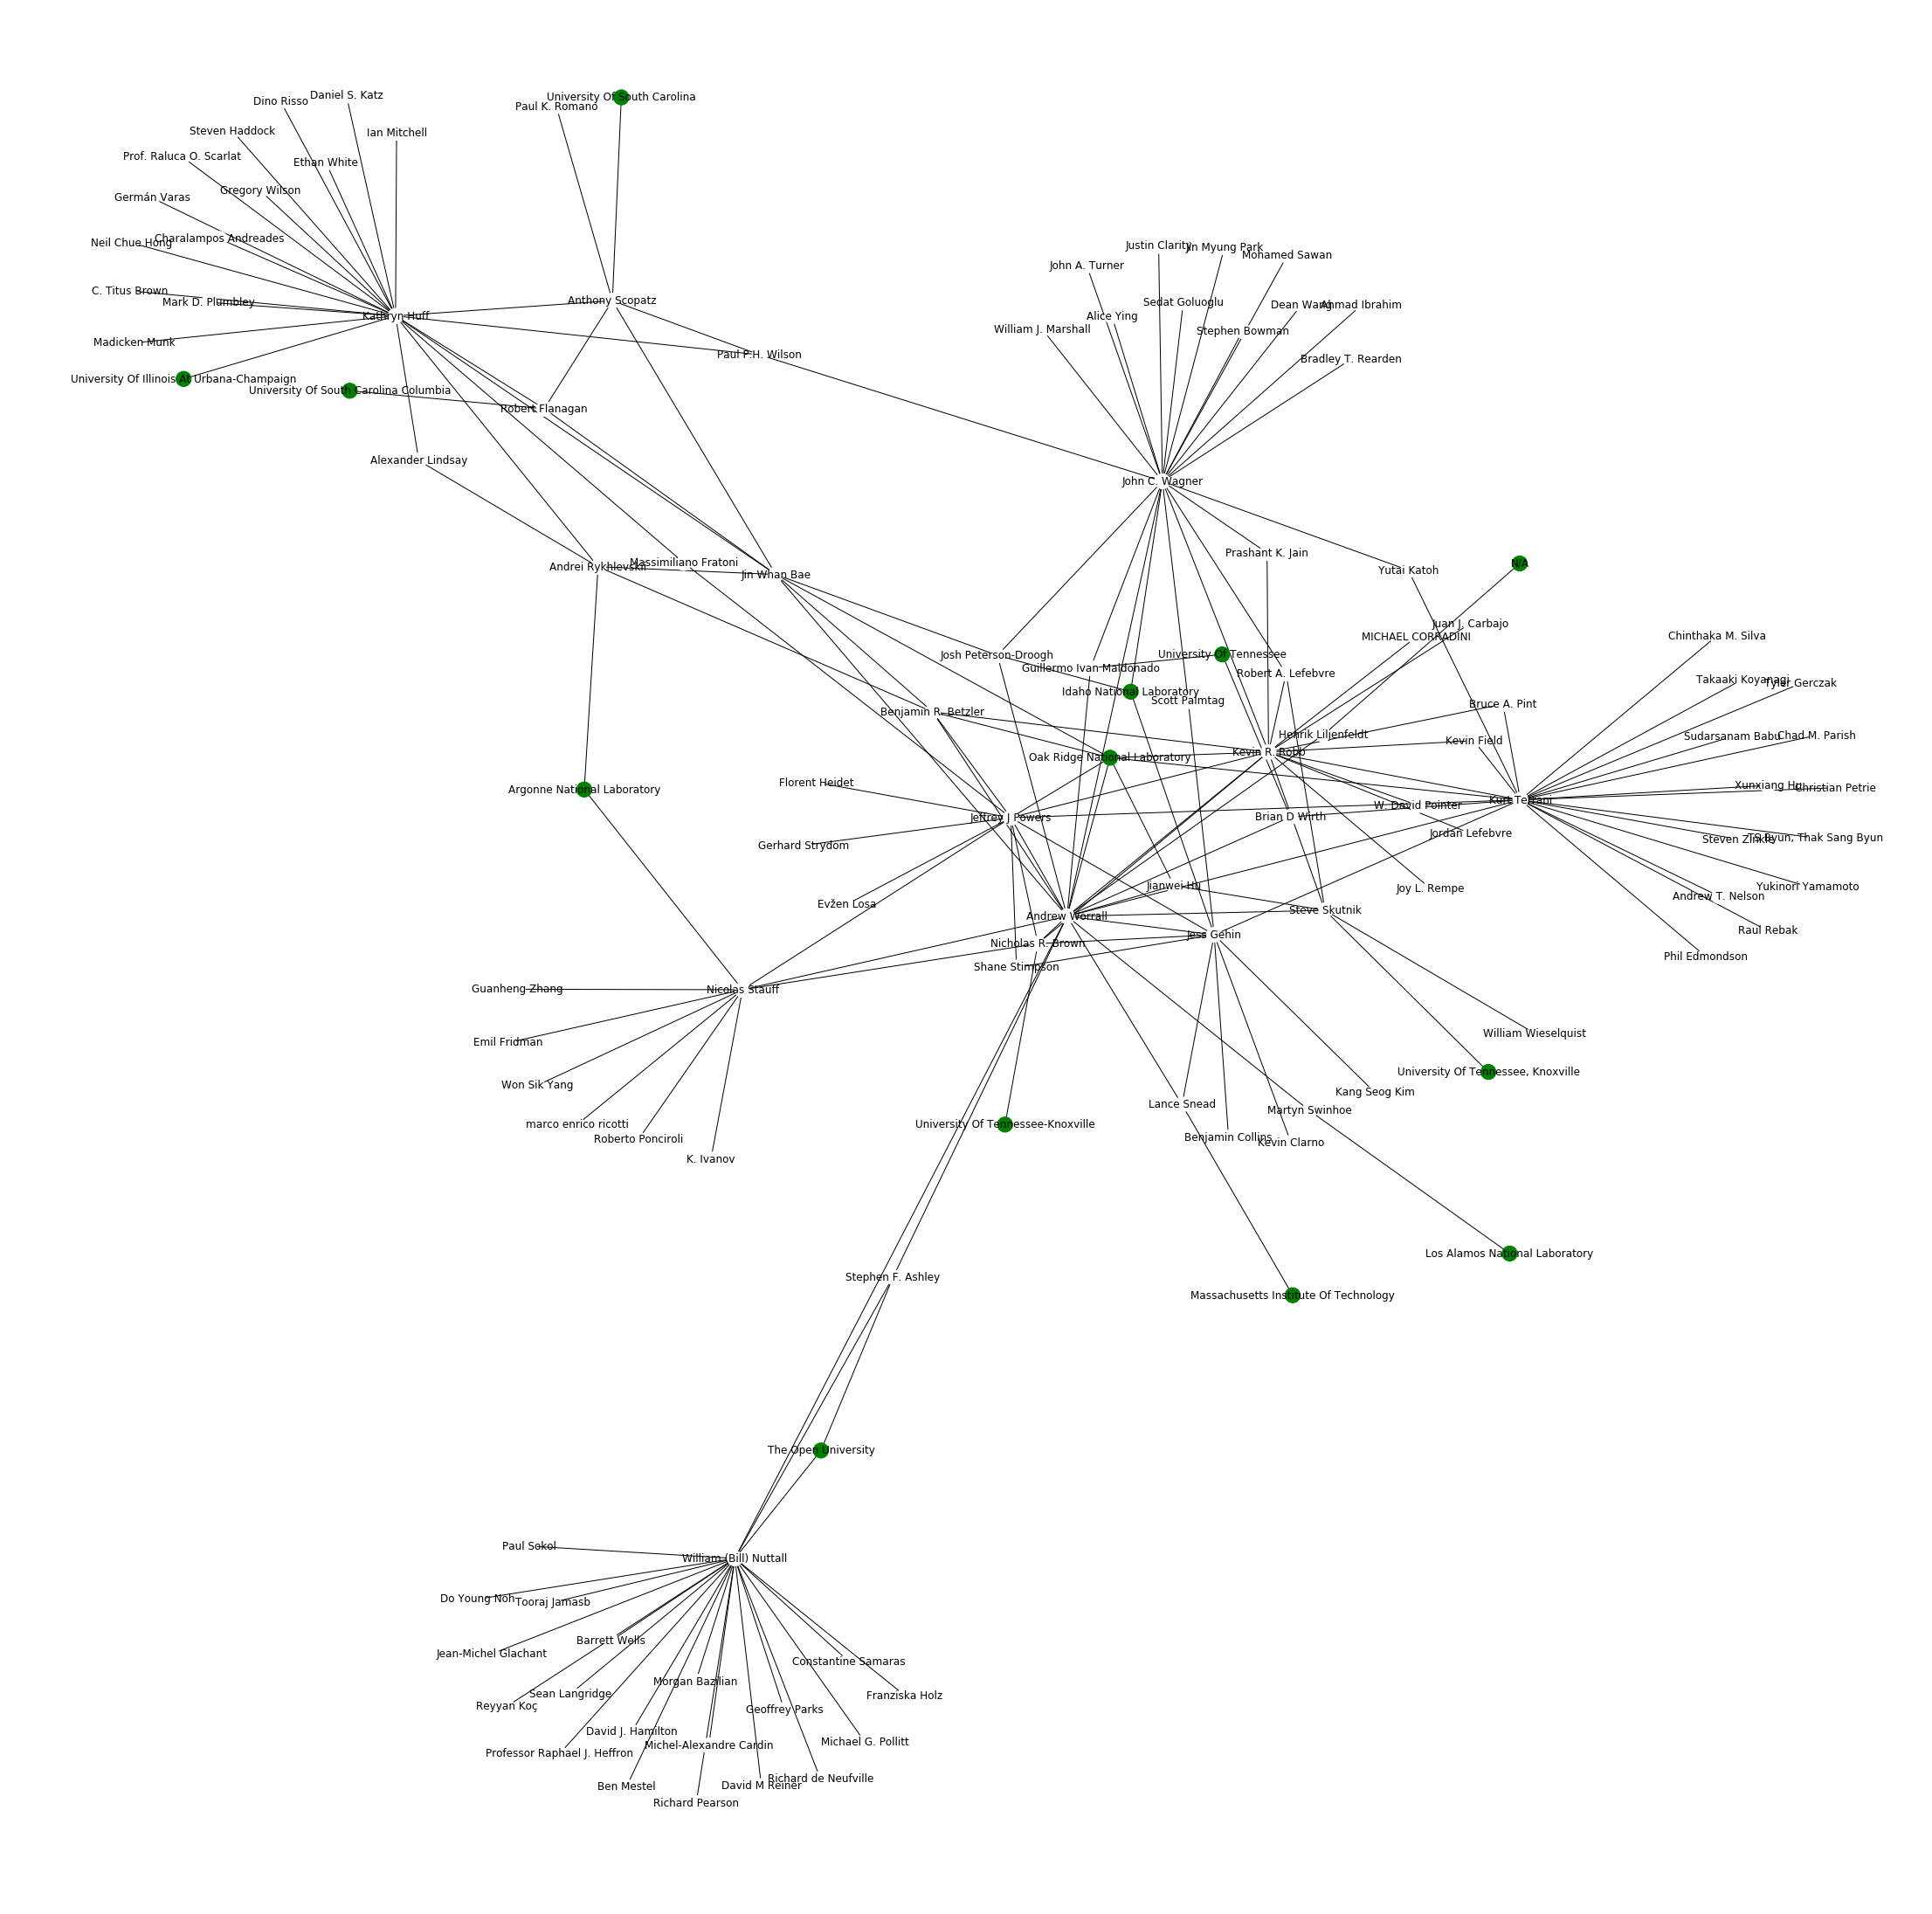

In [72]:
# visualization non-interactive
g = nx.Graph()

# make them nodes
for person in persons:
    g.add_node(person, color='white')
for organization in organizations:
    g.add_node(organization, color='green')

for indx, row in df.iterrows():
    name = row['Name']
    for collaborator in row['Collaborators']:
        g.add_edge(name, collaborator)
    g.add_edge(name, row['Organization'])

plt.figure(figsize=(30,30))
colors = [g.nodes[k]['color'] for k in list(g.nodes)]
#colors = [node['color'] for node in g.nodes]
nx.draw(g, with_labels=True, node_color=colors)
plt.savefig('./out/network.pdf')
plt.show()